In [66]:
from __future__ import division
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
pd.set_option('display.max_columns',500)
%matplotlib inline

In [4]:
df = pd.read_excel('TABLA1(1).xlsx').reset_index(drop=True)

In [5]:
df.head()

,ID,SEXO,EDAD,LUGAR,ESTATURA,PESO,INTERNET A DOMICILIO,COMIDA FAVORITA,POSTRE FAVORITO,RESTAURANTE,FUERA DE CASA,DESPERDICIO,COMIDAS AL DIA,ALIMENTOS SALADOS,ENFERMEDAD,ALIMENTOS DULCES,LITROS DIARIOS,ALERGIAS,MANDADO AL MES,DIETA,FRUTAS CITRICAS,OTRAS FRUTAS,JUGO DE FRUTA,FRUTOS SECOS,POSTRES LACTEOS,PASTELES,PAPAS FRITAS,HELADOS,GOLOSINAS,REFRESCO,REFRESCO LIGHT,VINO,CERVEZA,BEBIDAS DESTILADAS,HUEVOS,POLLO,RES,CERDO,PESCADO,MARISCOS,PAN,EMBUTIDOS,QUESOS NO GRASOS,QUESOS GRASOSOS,LECHE,YOGUR,CHOCOLATE,PAN DE DULCE,CEREALES,LEGUMBRES,VERDURAS,PATATAS,LEGUMINOSAS,ARROZ,PASTAS,SOPAS Y CREMAS,TORTILLAS,ALITAS,SUSHI,ENSALADAS,PIZZA,TACOS,SANDWICHES,CARNES,COMIDA CHINA,MEXICANA,CAFE O TE,Unnamed: 67,HOT DOGS,IMC,TARGET 1,TARGET 2
0,1,Femenino,45,satelite,156,60.0,No,FAST FOOD/ ITALIANA,FRUTA Y GELATINA,ALITAS,8,A veces,3,Tarde,NINGUNA,Noche,0.5,ninguno,8.0,SI,15,3,20,2,22,4,10,10,6,28,15,1,22,0,6,20,10,17,9,0,24,27,15,4,0,16,4,4,0,15,28,3,14,10,6,4,18,2,1,6,2,8,2,15,2,4,8,17,15,24.654832,0,1
1,2,Masculino,17,SATELITE,170,65.0,SI,MARISCOS/SUSHI,ARROZ CON LECHE,CARNES,10,A veces,5,Tarde,NINGUNA,Mañana,3.0,PENICILINA,4.0,NO,15,16,6,9,20,2,4,4,5,6,0,2,15,0,25,10,17,10,30,26,18,4,25,10,7,16,10,5,17,13,20,2,10,20,10,1,8,2,1,15,2,6,10,20,2,4,1,1,3,22.491349,0,0
2,3,Masculino,20,Obrero popular,164,63.0,No,MEXICANA,PAY DE LIMÓN,TACOS,30,Casi nunca,5,Tarde,NINGUNA,Tarde,1.5,Ninguno,4.0,NO,20,11,11,11,25,4,2,4,30,24,0,4,26,4,10,20,20,12,3,4,22,21,10,0,30,19,10,30,19,27,10,5,30,20,20,20,30,0,1,2,10,10,30,30,5,0,30,9,2,23.423557,0,0
3,4,Femenino,36,Letrán Valle,165,54.0,No,MEXICANA,ARROZ CON LECHE,CARNES,3,Siempre,3,Tarde,NINGUNA,Noche,1.0,Ninguno,4.0,NO,10,12,19,13,20,5,1,4,10,20,0,0,26,0,30,20,10,16,2,3,16,17,10,0,10,9,5,15,17,28,25,2,25,5,15,15,29,2,2,2,1,15,20,5,0,5,30,2,1,19.834711,0,1
4,5,Femenino,22,CD.MX.,156,44.0,SI,MEXICANA,PAY DE LIMÓN,CARNES,5,A veces,3,Tarde,NINGUNA,Mañana,1.0,Ninguno,5.0,NO,8,16,10,11,25,6,3,10,20,23,0,2,30,1,13,10,10,18,2,15,21,10,20,0,5,10,15,10,12,26,25,20,28,16,16,18,26,5,0,6,10,14,14,10,10,20,2,8,1,18.080210,0,1


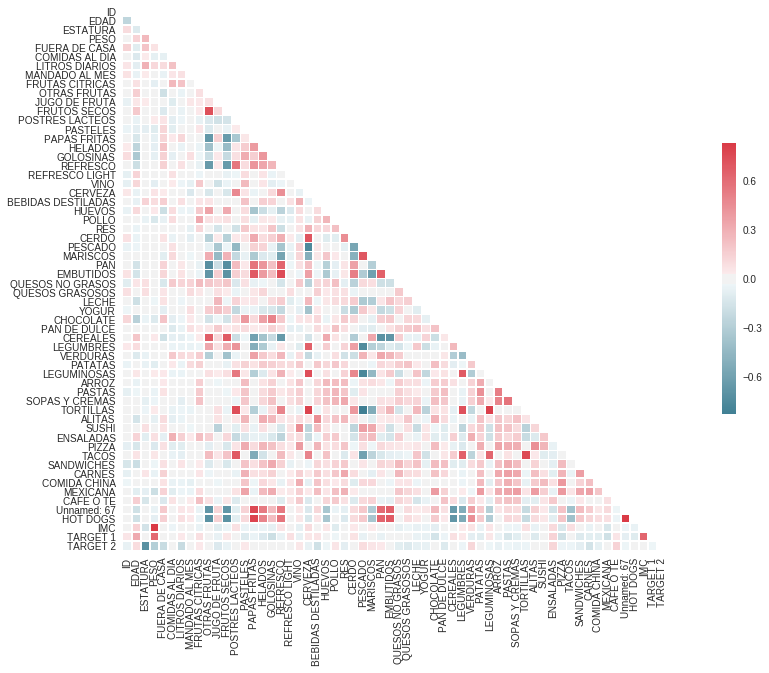

In [6]:
sns.set(style="white")

# Compute the correlation matrix
corr = df.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(20, 10))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax= .3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [7]:
df.shape

(321, 72)

In [8]:
df=df.dropna(subset=['PESO','MANDADO AL MES'], how='any')

In [9]:
var_disc=['ID','SEXO','LUGAR','INTERNET A DOMICILIO','RESTAURANTE ','DESPERDICIO ','COMIDA FAVORITA','POSTRE FAVORITO','RESTAURANTE','DESPERDICIO','ALIMENTOS SALADOS','ENFERMEDAD','ALIMENTOS DULCES','ALERGIAS','DIETA','IMC']
var_cont=[str(x) for x in df.columns if x not in var_disc]

In [10]:
X = df[var_cont].copy()

In [11]:
X.head()

,EDAD,ESTATURA,PESO,FUERA DE CASA,COMIDAS AL DIA,LITROS DIARIOS,MANDADO AL MES,FRUTAS CITRICAS,OTRAS FRUTAS,JUGO DE FRUTA,FRUTOS SECOS,POSTRES LACTEOS,PASTELES,PAPAS FRITAS,HELADOS,GOLOSINAS,REFRESCO,REFRESCO LIGHT,VINO,CERVEZA,BEBIDAS DESTILADAS,HUEVOS,POLLO,RES,CERDO,PESCADO,MARISCOS,PAN,EMBUTIDOS,QUESOS NO GRASOS,QUESOS GRASOSOS,LECHE,YOGUR,CHOCOLATE,PAN DE DULCE,CEREALES,LEGUMBRES,VERDURAS,PATATAS,LEGUMINOSAS,ARROZ,PASTAS,SOPAS Y CREMAS,TORTILLAS,ALITAS,SUSHI,ENSALADAS,PIZZA,TACOS,SANDWICHES,CARNES,COMIDA CHINA,MEXICANA,CAFE O TE,Unnamed: 67,HOT DOGS,TARGET 1,TARGET 2
0,45,156,60.0,8,3,0.5,8.0,15,3,20,2,22,4,10,10,6,28,15,1,22,0,6,20,10,17,9,0,24,27,15,4,0,16,4,4,0,15,28,3,14,10,6,4,18,2,1,6,2,8,2,15,2,4,8,17,15,0,1
1,17,170,65.0,10,5,3.0,4.0,15,16,6,9,20,2,4,4,5,6,0,2,15,0,25,10,17,10,30,26,18,4,25,10,7,16,10,5,17,13,20,2,10,20,10,1,8,2,1,15,2,6,10,20,2,4,1,1,3,0,0
2,20,164,63.0,30,5,1.5,4.0,20,11,11,11,25,4,2,4,30,24,0,4,26,4,10,20,20,12,3,4,22,21,10,0,30,19,10,30,19,27,10,5,30,20,20,20,30,0,1,2,10,10,30,30,5,0,30,9,2,0,0
3,36,165,54.0,3,3,1.0,4.0,10,12,19,13,20,5,1,4,10,20,0,0,26,0,30,20,10,16,2,3,16,17,10,0,10,9,5,15,17,28,25,2,25,5,15,15,29,2,2,2,1,15,20,5,0,5,30,2,1,0,1
4,22,156,44.0,5,3,1.0,5.0,8,16,10,11,25,6,3,10,20,23,0,2,30,1,13,10,10,18,2,15,21,10,20,0,5,10,15,10,12,26,25,20,28,16,16,18,26,5,0,6,10,14,14,10,10,20,2,8,1,0,1


In [12]:
X.describe()

,EDAD,ESTATURA,PESO,FUERA DE CASA,COMIDAS AL DIA,LITROS DIARIOS,MANDADO AL MES,FRUTAS CITRICAS,OTRAS FRUTAS,JUGO DE FRUTA,FRUTOS SECOS,POSTRES LACTEOS,PASTELES,PAPAS FRITAS,HELADOS,GOLOSINAS,REFRESCO,REFRESCO LIGHT,VINO,CERVEZA,BEBIDAS DESTILADAS,HUEVOS,POLLO,RES,CERDO,PESCADO,MARISCOS,PAN,EMBUTIDOS,QUESOS NO GRASOS,QUESOS GRASOSOS,LECHE,YOGUR,CHOCOLATE,PAN DE DULCE,CEREALES,LEGUMBRES,VERDURAS,PATATAS,LEGUMINOSAS,ARROZ,PASTAS,SOPAS Y CREMAS,TORTILLAS,ALITAS,SUSHI,ENSALADAS,PIZZA,TACOS,SANDWICHES,CARNES,COMIDA CHINA,MEXICANA,CAFE O TE,Unnamed: 67,HOT DOGS,TARGET 1,TARGET 2
count,318.000000,318.000000,318.000000,318.000000,318.000000,318.000000,318.000000,318.000000,318.000000,318.000000,318.000000,318.000000,318.000000,318.000000,318.000000,318.000000,318.000000,318.000000,318.000000,318.000000,318.000000,318.000000,318.000000,318.000000,318.000000,318.000000,318.000000,318.000000,318.000000,318.000000,318.000000,318.000000,318.000000,318.000000,318.000000,318.000000,318.000000,318.000000,318.000000,318.000000,318.000000,318.000000,318.000000,318.000000,318.000000,318.000000,318.000000,318.000000,318.000000,318.000000,318.000000,318.000000,318.000000,318.000000,318.000000,318.000000,318.000000,318.000000
mean,26.044025,164.292453,63.584906,11.820755,3.261006,1.683962,5.446541,16.172956,13.232704,14.207547,13.053459,17.276730,4.138365,5.949686,5.638365,8.597484,19.292453,1.971698,2.559748,22.738994,3.018868,12.185535,14.345912,13.619497,15.839623,9.289308,9.292453,20.911950,16.669811,11.207547,4.119497,13.707547,12.106918,7.638365,9.544025,11.047170,19.635220,22.515723,6.515723,18.113208,12.283019,10.191824,10.374214,18.418239,2.933962,2.235849,9.833333,4.062893,7.500000,9.468553,6.650943,1.704403,6.654088,18.537736,5.254717,5.000000,0.345912,0.622642
std,10.714444,8.948821,15.363647,8.487286,0.925176,0.757691,4.850637,8.315826,6.995893,6.244822,6.869696,7.271579,5.265180,4.936568,4.666618,9.082600,7.195732,4.795090,4.735384,6.950328,5.642305,7.730078,7.168972,7.857757,5.953771,8.371007,8.067108,5.287786,7.767182,8.583658,5.960294,10.871170,7.418615,7.155200,8.123045,6.397035,8.456921,7.728317,6.552246,7.482877,7.637804,7.296189,8.042566,8.602577,4.559323,4.068542,8.500541,4.677870,4.650396,7.175841,6.918693,3.513028,6.433830,11.182321,5.461182,6.149043,0.476414,0.485490
min,14.000000,147.000000,10.000000,0.000000,1.000000,0.500000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,20.000000,157.000000,56.000000,5.000000,3.000000,1.000000,3.000000,10.000000,9.000000,10.000000,9.000000,11.250000,1.000000,2.000000,2.000000,1.000000,14.000000,0.000000,0.000000,18.000000,0.000000,6.000000,10.000000,8.000000,13.000000,2.000000,4.000000,18.000000,11.000000,4.000000,0.000000,4.000000,6.000000,2.000000,3.000000,6.000000,13.000000,20.000000,1.000000,13.000000,5.000000,5.000000,4.000000,11.000000,0.000000,0.000000,3.000000,1.000000,3.000000,3.250000,1.000000,0.000000,2.000000,8.000000,1.000000,0.000000,0.000000,0.000000
50%,22.000000,163.500000,64.000000,10.000000,3.000000,1.500000,4.000000,15.000000,13.000000,14.000000,13.000000,19.000000,2.000000,4.000000,5.000000,5.000000,21.000000,0.000000,0.000000,25.000000,1.000000,10.000000,15.000000,12.000000,16.000000,7.000000,6.000000,21.000000,17.000000,10.000000,1.000000,10.000000,12.000000,5.000000,7.000000,11.000000,22.000000,25.000000,5.000000,19.000000,10.000000,10.000000,10.000000,18.000000,1.000000,1.000000,8.000000,2.000000,7.000000,10.000000,5.000000,0.000000,5.000000,20.000000,3.000000,2.000000,0.000000,1.000000
75%,26.750000,170.000000,74.000000,20.000000,4.000000,2.0000

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fa444e52ba8>,
      dtype=object)

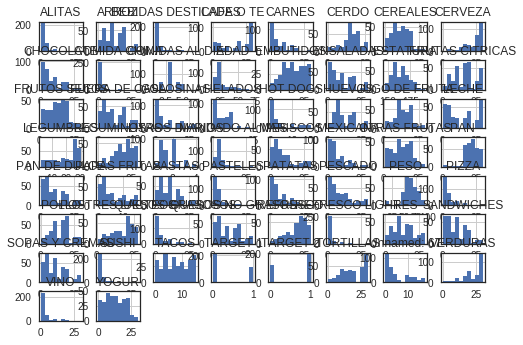

In [13]:
X.hist()

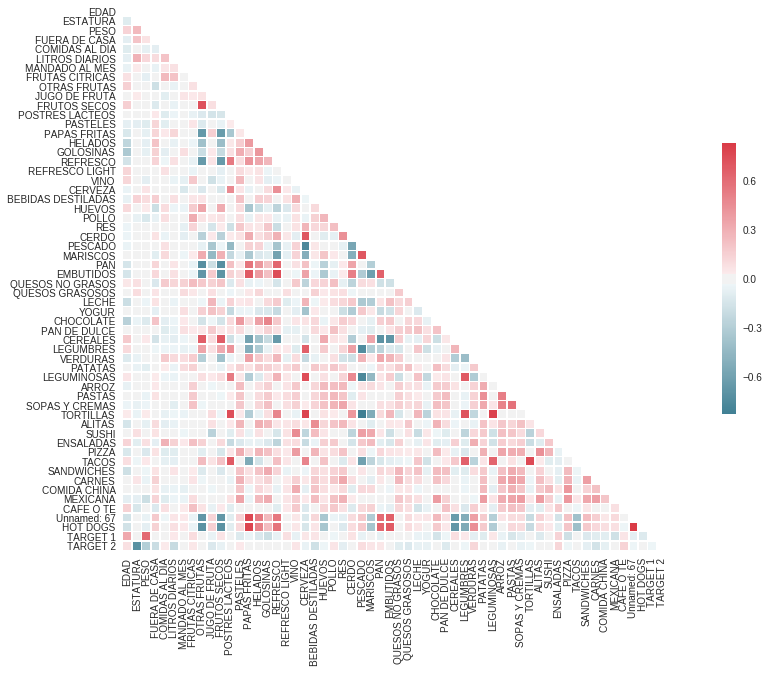

In [14]:
sns.set(style="white")

# Compute the correlation matrix
corr = X.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(20, 10))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax= .3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [15]:
X=X.dropna(how='any')

In [16]:
X.isnull().sum()

EDAD                  0
ESTATURA              0
PESO                  0
FUERA DE CASA         0
COMIDAS AL DIA        0
LITROS DIARIOS        0
MANDADO AL MES        0
FRUTAS CITRICAS       0
OTRAS FRUTAS          0
JUGO DE FRUTA         0
FRUTOS SECOS          0
POSTRES LACTEOS       0
PASTELES              0
PAPAS FRITAS          0
HELADOS               0
GOLOSINAS             0
REFRESCO              0
REFRESCO LIGHT        0
VINO                  0
CERVEZA               0
BEBIDAS DESTILADAS    0
HUEVOS                0
POLLO                 0
RES                   0
CERDO                 0
PESCADO               0
MARISCOS              0
PAN                   0
EMBUTIDOS             0
QUESOS NO GRASOS      0
QUESOS GRASOSOS       0
LECHE                 0
YOGUR                 0
CHOCOLATE             0
PAN DE DULCE          0
CEREALES              0
LEGUMBRES             0
VERDURAS              0
PATATAS               0
LEGUMINOSAS           0
ARROZ                 0
PASTAS          

In [17]:
X.shape

(318, 58)

In [18]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.manifold import MDS


In [19]:
sc = StandardScaler()
mm = MinMaxScaler()

In [20]:
sc.fit(X)
mm.fit(X)

MinMaxScaler(copy=True, feature_range=(0, 1))

In [21]:
Xs = pd.DataFrame(sc.transform(X),columns=X.columns)
Xmm = pd.DataFrame(mm.transform(X),columns=X.columns)

In [22]:
X.head()

,EDAD,ESTATURA,PESO,FUERA DE CASA,COMIDAS AL DIA,LITROS DIARIOS,MANDADO AL MES,FRUTAS CITRICAS,OTRAS FRUTAS,JUGO DE FRUTA,FRUTOS SECOS,POSTRES LACTEOS,PASTELES,PAPAS FRITAS,HELADOS,GOLOSINAS,REFRESCO,REFRESCO LIGHT,VINO,CERVEZA,BEBIDAS DESTILADAS,HUEVOS,POLLO,RES,CERDO,PESCADO,MARISCOS,PAN,EMBUTIDOS,QUESOS NO GRASOS,QUESOS GRASOSOS,LECHE,YOGUR,CHOCOLATE,PAN DE DULCE,CEREALES,LEGUMBRES,VERDURAS,PATATAS,LEGUMINOSAS,ARROZ,PASTAS,SOPAS Y CREMAS,TORTILLAS,ALITAS,SUSHI,ENSALADAS,PIZZA,TACOS,SANDWICHES,CARNES,COMIDA CHINA,MEXICANA,CAFE O TE,Unnamed: 67,HOT DOGS,TARGET 1,TARGET 2
0,45,156,60.0,8,3,0.5,8.0,15,3,20,2,22,4,10,10,6,28,15,1,22,0,6,20,10,17,9,0,24,27,15,4,0,16,4,4,0,15,28,3,14,10,6,4,18,2,1,6,2,8,2,15,2,4,8,17,15,0,1
1,17,170,65.0,10,5,3.0,4.0,15,16,6,9,20,2,4,4,5,6,0,2,15,0,25,10,17,10,30,26,18,4,25,10,7,16,10,5,17,13,20,2,10,20,10,1,8,2,1,15,2,6,10,20,2,4,1,1,3,0,0
2,20,164,63.0,30,5,1.5,4.0,20,11,11,11,25,4,2,4,30,24,0,4,26,4,10,20,20,12,3,4,22,21,10,0,30,19,10,30,19,27,10,5,30,20,20,20,30,0,1,2,10,10,30,30,5,0,30,9,2,0,0
3,36,165,54.0,3,3,1.0,4.0,10,12,19,13,20,5,1,4,10,20,0,0,26,0,30,20,10,16,2,3,16,17,10,0,10,9,5,15,17,28,25,2,25,5,15,15,29,2,2,2,1,15,20,5,0,5,30,2,1,0,1
4,22,156,44.0,5,3,1.0,5.0,8,16,10,11,25,6,3,10,20,23,0,2,30,1,13,10,10,18,2,15,21,10,20,0,5,10,15,10,12,26,25,20,28,16,16,18,26,5,0,6,10,14,14,10,10,20,2,8,1,0,1


In [23]:
Xs.head()

,EDAD,ESTATURA,PESO,FUERA DE CASA,COMIDAS AL DIA,LITROS DIARIOS,MANDADO AL MES,FRUTAS CITRICAS,OTRAS FRUTAS,JUGO DE FRUTA,FRUTOS SECOS,POSTRES LACTEOS,PASTELES,PAPAS FRITAS,HELADOS,GOLOSINAS,REFRESCO,REFRESCO LIGHT,VINO,CERVEZA,BEBIDAS DESTILADAS,HUEVOS,POLLO,RES,CERDO,PESCADO,MARISCOS,PAN,EMBUTIDOS,QUESOS NO GRASOS,QUESOS GRASOSOS,LECHE,YOGUR,CHOCOLATE,PAN DE DULCE,CEREALES,LEGUMBRES,VERDURAS,PATATAS,LEGUMINOSAS,ARROZ,PASTAS,SOPAS Y CREMAS,TORTILLAS,ALITAS,SUSHI,ENSALADAS,PIZZA,TACOS,SANDWICHES,CARNES,COMIDA CHINA,MEXICANA,CAFE O TE,Unnamed: 67,HOT DOGS,TARGET 1,TARGET 2
0,1.771986,-0.928114,-0.233705,-0.450883,-0.282560,-1.565056,0.527247,-0.141273,-1.464978,0.929023,-1.611553,0.650576,-0.026321,0.821765,0.936119,-0.286435,1.212006,2.721291,-0.329901,-0.106493,-0.535885,-0.801452,0.789932,-0.461353,0.195205,-0.034615,-1.153709,0.584917,1.332075,0.442519,-0.020080,-1.262895,0.525599,-0.509294,-0.683581,-1.729642,-0.548962,0.710752,-0.537413,-0.550549,-0.299381,-0.575428,-0.793809,-0.048694,-0.205170,-0.304236,-0.451662,-0.441685,0.107687,-1.042432,1.208641,0.084276,-0.413171,-0.943842,2.154075,1.628832,-0.727218,0.778499
1,-0.845427,0.638804,0.092252,-0.214865,1.882598,1.739644,-0.298687,-0.141273,0.396183,-1.316368,-0.590979,0.375099,-0.406773,-0.395570,-0.351635,-0.396710,-1.850180,-0.411839,-0.118392,-1.115227,-0.535885,1.660353,-0.607167,0.430890,-0.982373,2.477997,2.074334,-0.551562,-1.633769,1.609359,0.988168,-0.617976,0.525599,0.330579,-0.560281,0.932027,-0.785827,-0.326033,-0.690273,-1.085945,1.011959,-0.026332,-1.167412,-1.212969,-0.205170,-0.304236,0.608762,-0.441685,-0.323062,0.074177,1.932460,0.084276,-0.413171,-1.570817,-0.780311,-0.325766,-0.727218,-1.284523
2,-0.564990,-0.032732,-0.038131,2.145314,1.882598,-0.243176,-0.298687,0.460937,-0.319648,-0.514443,-0.299387,1.063791,-0.026321,-0.801348,-0.351635,2.360144,0.655245,-0.411839,0.304626,0.469927,0.174163,-0.283177,0.789932,0.813280,-0.645922,-0.752504,-0.657087,0.206091,0.558377,-0.140902,-0.692246,1.501046,0.930625,0.330579,2.522233,1.245165,0.872231,-1.622015,-0.231693,1.591036,1.011959,1.346406,1.198741,1.348435,-0.644523,-0.304236,-0.922962,1.271191,0.538436,2.865700,3.380097,0.939586,-1.035864,1.026650,0.686882,-0.488650,-0.727218,-1.284523
3,0.930675,0.079191,-0.624852,-1.040928,-0.282560,-0.904116,-0.298687,-0.743484,-0.176482,0.768638,-0.007794,0.375099,0.163906,-1.004238,-0.351635,0.154661,0.098484,-0.411839,-0.541410,0.469927,-0.535885,2.308197,0.789932,-0.461353,0.026980,-0.872153,-0.781243,-0.930388,0.042578,-0.140902,-0.692246,-0.341581,-0.419460,-0.369315,0.672725,0.932027,0.990664,0.321958,-0.690273,0.921791,-0.955052,0.660037,0.576069,1.232007,-0.205170,-0.058060,-0.922962,-0.655794,1.615308,1.469938,-0.238997,-0.485931,-0.257497,1.026650,-0.596912,-0.651533,-0.727218,0.778499
4,-0.378032,-0.928114,-1.276765,-0.804910,-0.282560,-0.904116,-0.092203,-0.984369,0.396183,-0.674828,-0.299387,1.063791,0.354132,-0.598459,0.936119,1.257403,0.516055,-0.411839,-0.118392,1.046346,-0.358373,0.105529,-0.607167,-0.461353,0.363431,-0.872153,0.708623,0.016678,-0.860070,1.025939,-0.692246,-0.802238,-0.284452,1.030473,0.056222,0.149183,0.753798,0.321958,2.061206,1.323338,0.487423,0.797311,0.949673,0.882725,0.453860,-0.550412,-0.451662,1.271191,1.399933,0.632482,0.484822,2.365102,2.077603,-1.481249,0.503483,-0.651533,-0.727218,0.778499


In [24]:
Xmm.head()

,EDAD,ESTATURA,PESO,FUERA DE CASA,COMIDAS AL DIA,LITROS DIARIOS,MANDADO AL MES,FRUTAS CITRICAS,OTRAS FRUTAS,JUGO DE FRUTA,FRUTOS SECOS,POSTRES LACTEOS,PASTELES,PAPAS FRITAS,HELADOS,GOLOSINAS,REFRESCO,REFRESCO LIGHT,VINO,CERVEZA,BEBIDAS DESTILADAS,HUEVOS,POLLO,RES,CERDO,PESCADO,MARISCOS,PAN,EMBUTIDOS,QUESOS NO GRASOS,QUESOS GRASOSOS,LECHE,YOGUR,CHOCOLATE,PAN DE DULCE,CEREALES,LEGUMBRES,VERDURAS,PATATAS,LEGUMINOSAS,ARROZ,PASTAS,SOPAS Y CREMAS,TORTILLAS,ALITAS,SUSHI,ENSALADAS,PIZZA,TACOS,SANDWICHES,CARNES,COMIDA CHINA,MEXICANA,CAFE O TE,Unnamed: 67,HOT DOGS,TARGET 1,TARGET 2
0,0.534483,0.200000,0.588235,0.266667,0.333333,0.000000,0.266667,0.500000,0.068966,0.655172,0.034483,0.777778,0.133333,0.6250,0.40,0.200000,0.933333,0.5,0.033333,0.733333,0.000000,0.200000,0.666667,0.333333,0.629630,0.300000,0.000000,0.800000,0.900000,0.500000,0.133333,0.000000,0.533333,0.133333,0.133333,0.000000,0.464286,0.933333,0.100000,0.466667,0.333333,0.200000,0.133333,0.600000,0.066667,0.033333,0.200000,0.066667,0.533333,0.066667,0.500000,0.066667,0.133333,0.266667,0.944444,0.789474,0.0,1.0
1,0.051724,0.511111,0.647059,0.333333,0.666667,0.714286,0.133333,0.500000,0.517241,0.172414,0.275862,0.703704,0.066667,0.2500,0.16,0.166667,0.200000,0.0,0.066667,0.500000,0.000000,0.833333,0.333333,0.566667,0.370370,1.000000,0.866667,0.600000,0.133333,0.833333,0.333333,0.233333,0.533333,0.333333,0.166667,0.566667,0.392857,0.666667,0.066667,0.333333,0.666667,0.333333,0.033333,0.266667,0.066667,0.033333,0.500000,0.066667,0.400000,0.333333,0.666667,0.066667,0.133333,0.033333,0.055556,0.157895,0.0,0.0
2,0.103448,0.377778,0.623529,1.000000,0.666667,0.285714,0.133333,0.666667,0.344828,0.344828,0.344828,0.888889,0.133333,0.1250,0.16,1.000000,0.800000,0.0,0.133333,0.866667,0.133333,0.333333,0.666667,0.666667,0.444444,0.100000,0.133333,0.733333,0.700000,0.333333,0.000000,1.000000,0.633333,0.333333,1.000000,0.633333,0.892857,0.333333,0.166667,1.000000,0.666667,0.666667,0.666667,1.000000,0.000000,0.033333,0.066667,0.333333,0.666667,1.000000,1.000000,0.166667,0.000000,1.000000,0.500000,0.105263,0.0,0.0
3,0.379310,0.400000,0.517647,0.100000,0.333333,0.142857,0.133333,0.333333,0.379310,0.620690,0.413793,0.703704,0.166667,0.0625,0.16,0.333333,0.666667,0.0,0.000000,0.866667,0.000000,1.000000,0.666667,0.333333,0.592593,0.066667,0.100000,0.533333,0.566667,0.333333,0.000000,0.333333,0.300000,0.166667,0.500000,0.566667,0.928571,0.833333,0.066667,0.833333,0.166667,0.500000,0.500000,0.966667,0.066667,0.066667,0.066667,0.033333,1.000000,0.666667,0.166667,0.000000,0.166667,1.000000,0.111111,0.052632,0.0,1.0
4,0.137931,0.200000,0.400000,0.166667,0.333333,0.142857,0.166667,0.266667,0.517241,0.310345,0.344828,0.888889,0.200000,0.1875,0.40,0.666667,0.766667,0.0,0.066667,1.000000,0.033333,0.433333,0.333333,0.333333,0.666667,0.066667,0.500000,0.700000,0.333333,0.666667,0.000000,0.166667,0.333333,0.500000,0.333333,0.400000,0.857143,0.833333,0.666667,0.933333,0.533333,0.533333,0.600000,0.866667,0.166667,0.000000,0.200000,0.333333,0.933333,0.466667,0.333333,0.333333,0.666667,0.066667,0.444444,0.052632,0.0,1.0


In [25]:
pca = PCA(n_components=2)
pca.fit(Xs)
Xp = pd.DataFrame(pca.transform(Xs),columns=['P1','P2'])

In [26]:
Xp.head()

,P1,P2
0,3.637361,0.141640
1,-2.666277,3.585802
2,1.274613,-2.234508
3,-1.559252,-2.649077
4,0.750957,-1.852364


In [27]:
mds = MDS(n_components=2)
Xm = pd.DataFrame(mds.fit_transform(Xmm),columns=['d1','d2'])

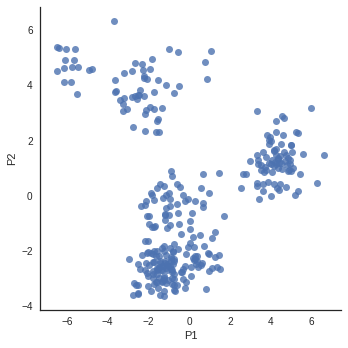

In [28]:
sns.lmplot(data=Xp,x='P1',y='P2',fit_reg=False)

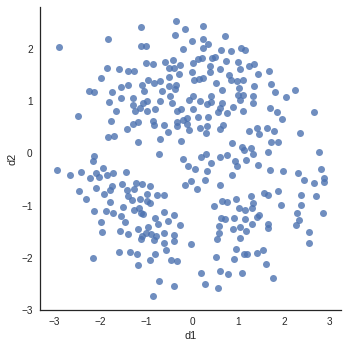

In [29]:
sns.lmplot(data=Xm,x='d1',y='d2',fit_reg=False)

In [30]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans
from sklearn.mixture import GMM

In [31]:
lst_inertia = []
for k in range(2,11):
    cl = KMeans(n_clusters=k)
    cl.fit(Xmm)
    lst_inertia.append(cl.inertia_)

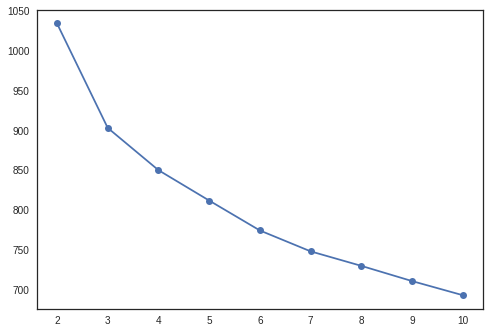

In [32]:
plt.plot(range(2,11),lst_inertia,marker='o')

In [33]:
cl = GMM(n_components=5)

/home/jomanchel/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:58: DeprecationWarning: Class GMM is deprecated; The class GMM is deprecated in 0.18 and will be  removed in 0.20. Use class GaussianMixture instead.
  warnings.warn(msg, category=DeprecationWarning)


In [34]:
Xp['cl']=Xmm['cl'] = Xm['cl']=Xs['cl'] = df['cl'] = cl.fit_predict(Xmm)

/home/jomanchel/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function distribute_covar_matrix_to_match_covariance_type is deprecated; The function distribute_covar_matrix_to_match_covariance_typeis deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
/home/jomanchel/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
/home/jomanchel/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
/home/jomanchel/anaconda3/lib/python3.6/

In [35]:
from sklearn.feature_selection import SelectKBest

In [36]:
sk = SelectKBest(k=15)

In [37]:
sk.fit(Xmm[var_cont],Xmm['cl'])

SelectKBest(k=15, score_func=<function f_classif at 0x7fa43c10ef28>)

In [38]:
var_best= [x for x,y in zip(var_cont,sk.get_support()) if y]

In [39]:
var_best

['FRUTOS SECOS',
 'POSTRES LACTEOS',
 'PAPAS FRITAS',
 'REFRESCO',
 'CERVEZA',
 'CERDO',
 'PESCADO',
 'MARISCOS',
 'EMBUTIDOS',
 'LEGUMBRES',
 'LEGUMINOSAS',
 'TORTILLAS',
 'TACOS',
 'Unnamed: 67',
 'HOT DOGS']

In [40]:
Xmm[['cl']+var_best].groupby('cl').mean()

,FRUTOS SECOS,POSTRES LACTEOS,PAPAS FRITAS,REFRESCO,CERVEZA,CERDO,PESCADO,MARISCOS,EMBUTIDOS,LEGUMBRES,LEGUMINOSAS,TORTILLAS,TACOS,Unnamed: 67,HOT DOGS
cl,,,,,,,,,,,,,,,
0,0.920259,0.055556,0.175781,0.100000,0.122917,0.050926,0.583333,0.483333,0.058333,0.359375,0.150000,0.066667,0.279167,0.100694,0.075658
1,0.478161,0.542387,0.165278,0.402963,0.477778,0.308642,0.857037,0.861481,0.224444,0.345238,0.322963,0.253333,0.297778,0.154321,0.095906
2,0.484601,0.849307,0.144561,0.721374,0.917812,0.611252,0.066158,0.205852,0.533333,0.905398,0.823664,0.914504,0.820356,0.128923,0.089996
3,0.100796,0.561254,0.830929,0.905128,0.695726,0.623457,0.403419,0.139316,0.890171,0.317308,0.462393,0.502137,0.270085,0.755698,0.782051
4,0.512213,0.236883,0.505208,0.409722,0.897222,0.898920,0.217361,0.295139,0.549306,0.742560,0.647917,0.495833,0.262500,0.175926,0.111842


In [41]:
df.head()

,ID,SEXO,EDAD,LUGAR,ESTATURA,PESO,INTERNET A DOMICILIO,COMIDA FAVORITA,POSTRE FAVORITO,RESTAURANTE,FUERA DE CASA,DESPERDICIO,COMIDAS AL DIA,ALIMENTOS SALADOS,ENFERMEDAD,ALIMENTOS DULCES,LITROS DIARIOS,ALERGIAS,MANDADO AL MES,DIETA,FRUTAS CITRICAS,OTRAS FRUTAS,JUGO DE FRUTA,FRUTOS SECOS,POSTRES LACTEOS,PASTELES,PAPAS FRITAS,HELADOS,GOLOSINAS,REFRESCO,REFRESCO LIGHT,VINO,CERVEZA,BEBIDAS DESTILADAS,HUEVOS,POLLO,RES,CERDO,PESCADO,MARISCOS,PAN,EMBUTIDOS,QUESOS NO GRASOS,QUESOS GRASOSOS,LECHE,YOGUR,CHOCOLATE,PAN DE DULCE,CEREALES,LEGUMBRES,VERDURAS,PATATAS,LEGUMINOSAS,ARROZ,PASTAS,SOPAS Y CREMAS,TORTILLAS,ALITAS,SUSHI,ENSALADAS,PIZZA,TACOS,SANDWICHES,CARNES,COMIDA CHINA,MEXICANA,CAFE O TE,Unnamed: 67,HOT DOGS,IMC,TARGET 1,TARGET 2,cl
0,1,Femenino,45,satelite,156,60.0,No,FAST FOOD/ ITALIANA,FRUTA Y GELATINA,ALITAS,8,A veces,3,Tarde,NINGUNA,Noche,0.5,ninguno,8.0,SI,15,3,20,2,22,4,10,10,6,28,15,1,22,0,6,20,10,17,9,0,24,27,15,4,0,16,4,4,0,15,28,3,14,10,6,4,18,2,1,6,2,8,2,15,2,4,8,17,15,24.654832,0,1,3
1,2,Masculino,17,SATELITE,170,65.0,SI,MARISCOS/SUSHI,ARROZ CON LECHE,CARNES,10,A veces,5,Tarde,NINGUNA,Mañana,3.0,PENICILINA,4.0,NO,15,16,6,9,20,2,4,4,5,6,0,2,15,0,25,10,17,10,30,26,18,4,25,10,7,16,10,5,17,13,20,2,10,20,10,1,8,2,1,15,2,6,10,20,2,4,1,1,3,22.491349,0,0,1
2,3,Masculino,20,Obrero popular,164,63.0,No,MEXICANA,PAY DE LIMÓN,TACOS,30,Casi nunca,5,Tarde,NINGUNA,Tarde,1.5,Ninguno,4.0,NO,20,11,11,11,25,4,2,4,30,24,0,4,26,4,10,20,20,12,3,4,22,21,10,0,30,19,10,30,19,27,10,5,30,20,20,20,30,0,1,2,10,10,30,30,5,0,30,9,2,23.423557,0,0,2
3,4,Femenino,36,Letrán Valle,165,54.0,No,MEXICANA,ARROZ CON LECHE,CARNES,3,Siempre,3,Tarde,NINGUNA,Noche,1.0,Ninguno,4.0,NO,10,12,19,13,20,5,1,4,10,20,0,0,26,0,30,20,10,16,2,3,16,17,10,0,10,9,5,15,17,28,25,2,25,5,15,15,29,2,2,2,1,15,20,5,0,5,30,2,1,19.834711,0,1,2
4,5,Femenino,22,CD.MX.,156,44.0,SI,MEXICANA,PAY DE LIMÓN,CARNES,5,A veces,3,Tarde,NINGUNA,Mañana,1.0,Ninguno,5.0,NO,8,16,10,11,25,6,3,10,20,23,0,2,30,1,13,10,10,18,2,15,21,10,20,0,5,10,15,10,12,26,25,20,28,16,16,18,26,5,0,6,10,14,14,10,10,20,2,8,1,18.080210,0,1,2


In [42]:
aux = df[['ID','INTERNET A DOMICILIO','COMIDA FAVORITA','POSTRE FAVORITO','SEXO','RESTAURANTE ','DIETA','cl']].copy()

In [43]:
aux['n'] = 1

In [44]:
piv = aux.pivot_table(index='COMIDA FAVORITA',
                columns='cl',
                values='n',
                fill_value=0,
                aggfunc='count')

In [45]:
for i in range(4):
    piv[i]/=piv[i].sum()

In [46]:
piv.sort_values(3,ascending=0)

cl,0,1,2,3,4
COMIDA FAVORITA,,,,,
FAST FOOD/ ITALIANA,0.0,0.0,0.0,1.0,0
CARNES/CORTES,0.0,0.0,0.0,0.0,48
ENSALADAS,1.0,0.0,0.0,0.0,0
MARISCOS/SUSHI,0.0,1.0,0.0,0.0,0
MEXICANA,0.0,0.0,1.0,0.0,0


In [47]:
df.loc[df.cl==1].sample(frac=1)[['SEXO','RESTAURANTE ','POSTRE FAVORITO','DIETA']]

,SEXO,RESTAURANTE,POSTRE FAVORITO,DIETA
210,Femenino,SUSHI,PAY DE LIMÓN,NO
168,Femenino,MEXICANA,HELADO,NO
159,Femenino,NaN,NaN,NO
182,Femenino,SUSHI,FRUTA Y GELATINA,NO
282,Femenino,SUSHI,PASTEL,NO
274,Femenino,CASUAL,FRUTA Y GELATINA,NO
99,Femenino,SUSHI,CHEEESECAKE,NO
62,Masculino,CARNES,FRESAS CON CREMA,NO
112,Femenino,ALITAS,PAN DULCE,NO
303,Femenino,SUSHI,PAY DE LIMÓN,NO


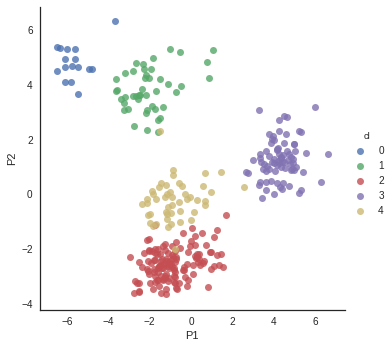

In [48]:
sns.lmplot(data=Xp,x='P1',y='P2',hue='cl',fit_reg=False)

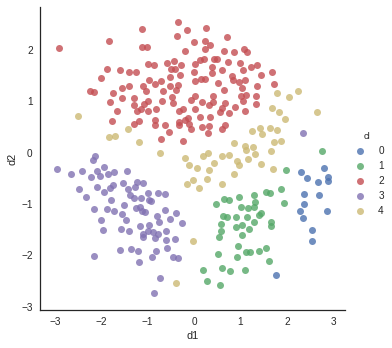

In [49]:
sns.lmplot(data=Xm.merge(df[['ID']],left_index=True,right_index=True,how='inner'),x='d1',y='d2',hue='cl',fit_reg=False)

In [50]:
df.head()

,ID,SEXO,EDAD,LUGAR,ESTATURA,PESO,INTERNET A DOMICILIO,COMIDA FAVORITA,POSTRE FAVORITO,RESTAURANTE,FUERA DE CASA,DESPERDICIO,COMIDAS AL DIA,ALIMENTOS SALADOS,ENFERMEDAD,ALIMENTOS DULCES,LITROS DIARIOS,ALERGIAS,MANDADO AL MES,DIETA,FRUTAS CITRICAS,OTRAS FRUTAS,JUGO DE FRUTA,FRUTOS SECOS,POSTRES LACTEOS,PASTELES,PAPAS FRITAS,HELADOS,GOLOSINAS,REFRESCO,REFRESCO LIGHT,VINO,CERVEZA,BEBIDAS DESTILADAS,HUEVOS,POLLO,RES,CERDO,PESCADO,MARISCOS,PAN,EMBUTIDOS,QUESOS NO GRASOS,QUESOS GRASOSOS,LECHE,YOGUR,CHOCOLATE,PAN DE DULCE,CEREALES,LEGUMBRES,VERDURAS,PATATAS,LEGUMINOSAS,ARROZ,PASTAS,SOPAS Y CREMAS,TORTILLAS,ALITAS,SUSHI,ENSALADAS,PIZZA,TACOS,SANDWICHES,CARNES,COMIDA CHINA,MEXICANA,CAFE O TE,Unnamed: 67,HOT DOGS,IMC,TARGET 1,TARGET 2,cl
0,1,Femenino,45,satelite,156,60.0,No,FAST FOOD/ ITALIANA,FRUTA Y GELATINA,ALITAS,8,A veces,3,Tarde,NINGUNA,Noche,0.5,ninguno,8.0,SI,15,3,20,2,22,4,10,10,6,28,15,1,22,0,6,20,10,17,9,0,24,27,15,4,0,16,4,4,0,15,28,3,14,10,6,4,18,2,1,6,2,8,2,15,2,4,8,17,15,24.654832,0,1,3
1,2,Masculino,17,SATELITE,170,65.0,SI,MARISCOS/SUSHI,ARROZ CON LECHE,CARNES,10,A veces,5,Tarde,NINGUNA,Mañana,3.0,PENICILINA,4.0,NO,15,16,6,9,20,2,4,4,5,6,0,2,15,0,25,10,17,10,30,26,18,4,25,10,7,16,10,5,17,13,20,2,10,20,10,1,8,2,1,15,2,6,10,20,2,4,1,1,3,22.491349,0,0,1
2,3,Masculino,20,Obrero popular,164,63.0,No,MEXICANA,PAY DE LIMÓN,TACOS,30,Casi nunca,5,Tarde,NINGUNA,Tarde,1.5,Ninguno,4.0,NO,20,11,11,11,25,4,2,4,30,24,0,4,26,4,10,20,20,12,3,4,22,21,10,0,30,19,10,30,19,27,10,5,30,20,20,20,30,0,1,2,10,10,30,30,5,0,30,9,2,23.423557,0,0,2
3,4,Femenino,36,Letrán Valle,165,54.0,No,MEXICANA,ARROZ CON LECHE,CARNES,3,Siempre,3,Tarde,NINGUNA,Noche,1.0,Ninguno,4.0,NO,10,12,19,13,20,5,1,4,10,20,0,0,26,0,30,20,10,16,2,3,16,17,10,0,10,9,5,15,17,28,25,2,25,5,15,15,29,2,2,2,1,15,20,5,0,5,30,2,1,19.834711,0,1,2
4,5,Femenino,22,CD.MX.,156,44.0,SI,MEXICANA,PAY DE LIMÓN,CARNES,5,A veces,3,Tarde,NINGUNA,Mañana,1.0,Ninguno,5.0,NO,8,16,10,11,25,6,3,10,20,23,0,2,30,1,13,10,10,18,2,15,21,10,20,0,5,10,15,10,12,26,25,20,28,16,16,18,26,5,0,6,10,14,14,10,10,20,2,8,1,18.080210,0,1,2


In [62]:
df1=df.groupby(['COMIDA FAVORITA'])[['FUERA DE CASA']].sum()

In [63]:
print(df1['FUERA DE CASA'].idxmax(),end=" ")

MEXICANA 

In [71]:
print(df1)

                     FUERA DE CASA
COMIDA FAVORITA                   
CARNES/CORTES                  533
ENSALADAS                      127
FAST FOOD/ ITALIANA           1095
MARISCOS/SUSHI                 507
MEXICANA                      1497


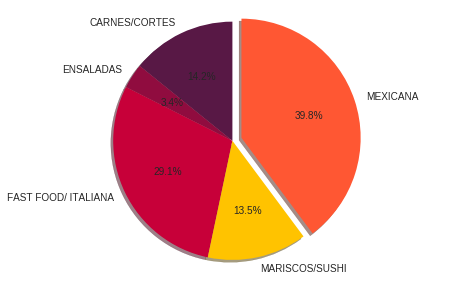

In [116]:
# Pie chart
fig = plt.figure()
labels = ['CARNES/CORTES', 'ENSALADAS', 'FAST FOOD/ ITALIANA', 'MARISCOS/SUSHI','MEXICANA']
sizes = [533, 127, 1095,507, 1497]

# only "explode" the 2nd slice (i.e. 'Hogs')
explode = (0, 0, 0, 0,0.08)

#add colors
colors = ['#581845','#900c3f','#c70039','#ffc300','#ff5733']

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%',
        shadow=True, startangle=90)

# Equal aspect ratio ensures that pie is drawn as a circle
ax1.axis('equal')

plt.tight_layout()
plt.show()

plt.savefig('destination_path.eps', format='eps', dpi=1000)